# Project Overview

This project is intended to determine cricket's best test XI of all time (statistically) based on a problem statement and given criteria. The final results are to be displayed on an interactive Power BI Dashboard and validated using SQL queries.

Database Used: Cricinfo (https://www.espncricinfo.com/)

# Problem Statement

Build cricket's best test 11 of all time (statistically) - The team should consist of 5 batters, 2 all-rounders, 1 wicket-keeper and 3 bowlers.

The individual criteria for each role should be based on the below  - 

   1. Batters - 
       * Matches played more than 100
       * Total career runs should be more than 10,000
       * Centuries more than 30
       * Average more than 50
       * Career span of more than 12 years
       ---
   2. Bowlers - 
       * Matches played more than 100
       * Total career wickets should be more than 500
       * Strike Rate of less than 60
       * Average less than 30
       * Career span of more than 12 years
       ---
   3. All-Rounders - 
       * Matches played more than 100
       * Total career runs more than 5000 and wickets should be more than 200
       * Career span of more than 12 years
       ---
   4. Wicket Keepers - 
       * Matches played more than 100
       * Total career Wk_Dismissals more than 300
       * Total career Dismissals_per_innings more than 1.5
       * Career span of more than 12 years

# Import python libraries & data research

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from IPython.display import Image

%matplotlib inline
rcParams['figure.figsize']=8,4

In [2]:
# webscraping

batting_url = 'https://www.espncricinfo.com/records/most-runs-in-career-223646'
bowling_url = 'https://www.espncricinfo.com/records/most-wickets-in-career-93276'
allrounder_url = 'https://www.espncricinfo.com/records/1000-runs-and-100-wickets-282786'
wkeep_url = 'https://www.espncricinfo.com/records/most-dismissals-in-career-283791'

In [3]:
# read html

bat = pd.read_html(batting_url)
bowl = pd.read_html(bowling_url)
all_round = pd.read_html(allrounder_url)
wicket_keeping = pd.read_html(wkeep_url)

In [4]:
# assign to dataframes

batters = bat[0]
bowlers = bowl[0]
all_rounders = all_round[0]
wicket_keepers = wicket_keeping[0]

In [5]:
# Show entire rows and columns when called (useful for quickly glancing through all rows and columns)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
batters.head(2)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SR Tendulkar (IND),1989-2013,200,329,33,15921,248*,53.78,29437+,54.04,51,68,14,2058+,69
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,22782,58.72,41,62,17,1509,73


In [7]:
bowlers.head(2)

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,7339.5,1794,18180,800,9/51,22.72,2.47,55.04,45,67
1,SK Warne (AUS),1992-2007,145,273,40705,6784.1,1761,17995,708,8/71,25.41,2.65,57.49,48,37


In [8]:
all_rounders.head(2)

,Player,Span,Mat,Runs,HS,Ave,100,Wkts,BBI,Ave.1,5,Ct,St
0,G Giffen (AUS),1881-1896,31,1238,161,23.35,1,103,7/117,27.09,7,24,-
1,MA Noble (AUS),1898-1909,42,1997,133,30.25,1,121,7/17,25.00,9,26,-


In [9]:
wicket_keepers.head(2)

,Player,Span,Mat,Inns,Dis,Ct,St,Max Dis Inns,Dis/Inn
0,MV Boucher (ICC/SA),1997-2012,147,281,555,532,23,6 (6ct 0st),1.975
1,AC Gilchrist (AUS),1999-2008,96,191,416,379,37,5 (5ct 0st),2.178


In [10]:
print("Shape of batters table:", batters.shape)
print("Shape of bowlers table:", bowlers.shape)
print("Shape of all_rounders table:", all_rounders.shape)
print("Shape of wicket_keepers table:", wicket_keepers.shape)

Shape of batters table: (107, 15)
Shape of bowlers table: (82, 15)
Shape of all_rounders table: (75, 13)
Shape of wicket_keepers table: (90, 9)


In [11]:
# Merge dataframes

best = pd.merge(batters,bowlers, left_on = ["Player","Span","Mat"], right_on = ["Player","Span","Mat"], how = "outer", suffixes = ("_bat","_bowl")
                  ).merge(all_rounders, left_on = ["Player","Span","Mat"], right_on = ["Player","Span","Mat"], how = "outer"
                         ).merge(wicket_keepers, on = ["Player","Span","Mat"], how = "outer")

In [12]:
best.head(3)

,Player,Span,Mat,Inns_bat,NO,Runs_bat,HS_x,Ave_bat,BF,SR_bat,100_x,50,0,4s,6s,Inns_bowl,Balls,Overs,Mdns,Runs_bowl,Wkts_x,BBI_x,Ave_bowl,Econ,SR_bowl,4,5_x,Runs,HS_y,Ave,100_y,Wkts_y,BBI_y,Ave.1,5_y,Ct_x,St_x,Inns,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn
0,SR Tendulkar (IND),1989-2013,200,329.0,33.0,15921.0,248*,53.78,29437+,54.04,51.0,68.0,14.0,2058+,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RT Ponting (AUS),1995-2012,168,287.0,29.0,13378.0,257,51.85,22782,58.72,41.0,62.0,17.0,1509,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JH Kallis (ICC/SA),1995-2013,166,280.0,40.0,13289.0,224,55.37,28903,45.97,45.0,58.0,16.0,1488,97,272.0,20232.0,3372.0,848.0,9535.0,292.0,6/54,32.65,2.82,69.28,7.0,5.0,13289.0,224,55.37,45,292.0,6/54,32.65,5.0,200.0,-,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print("Shape of best table:", best.shape)

Shape of best table: (294, 43)


# Data Cleaning

* Create a 'Role' column (batter, bowler, allrounder, wk) right next to 'player' column
* Separate country name from player name and create the new 'Country' column right next to 'Speciality' column.
* Split 'span' column and have 2 separate columns for start and end dates, create a new column 'Career Span'
* Remove unwanted columns, merge common columns and add new columns if required
* Remove unwanted characters (e.g. *, +) from the columns
* Check for missing values (and fill if found)
* Check and drop duplicates (if found)
* Check and change data types
* Rename column headers to something more generally comprehendable & rearrange column indexes

In [14]:
# check dataframe general info

best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        294 non-null    object 
 1   Span          294 non-null    object 
 2   Mat           294 non-null    int64  
 3   Inns_bat      107 non-null    float64
 4   NO            107 non-null    float64
 5   Runs_bat      107 non-null    float64
 6   HS_x          107 non-null    object 
 7   Ave_bat       107 non-null    float64
 8   BF            107 non-null    object 
 9   SR_bat        107 non-null    float64
 10  100_x         107 non-null    float64
 11  50            107 non-null    float64
 12  0             107 non-null    float64
 13  4s            107 non-null    object 
 14  6s            107 non-null    object 
 15  Inns_bowl     82 non-null     float64
 16  Balls         82 non-null     float64
 17  Overs         82 non-null     object 
 18  Mdns          82 non-null     

In [15]:
# Create a 'Role' column (batter, bowler, allrounder, wk) 

best.loc[best['Player'].isin(batters['Player']), 'Role'] = 'Batter'
best.loc[best['Player'].isin(all_rounders['Player']), 'Role'] = 'All_Rounder'
best.loc[best['Player'].isin(batters['Player']) & best['Player'].isin(bowlers['Player']) & best['Player'].isin(all_rounders['Player']), 'Role'] = 'All_Rounder'
best.loc[best['Player'].isin(bowlers['Player']) & ~best['Player'].isin(batters['Player']) & best['Player'].isin(all_rounders['Player']),'Role'] = 'Bowler'
best.loc[best['Player'].isin(bowlers['Player']) & ~best['Player'].isin(batters['Player']) & ~best['Player'].isin(all_rounders['Player']),'Role'] = 'Bowler'
best.loc[best['Player'].isin(wicket_keepers['Player']) & ~best['Player'].isin(batters['Player']), 'Role'] = 'Wicket_Keeper'
best.loc[best['Player'].isin(batters['Player']) & best['Player'].isin(wicket_keepers['Player']), 'Role'] = 'Wicket_Keeper'

In [16]:
# place it right next to 'player' column

role = best.pop('Role')
best.insert(1, role.name, role)

In [17]:
# Separate country name from player name in have it in a new column

best["Country"] = best["Player"].str.split(pat = '(').str[1]

In [18]:
best["Country"] = best["Country"].str.split(pat = ')').str[0]

In [19]:
best["Country"].head(3)

0       IND
1       AUS
2    ICC/SA
Name: Country, dtype: object

In [20]:
best["Player"] = best["Player"].str.split(pat = '(').str[0]

best["Player"].head(3)

0    SR Tendulkar 
1      RT Ponting 
2       JH Kallis 
Name: Player, dtype: object

In [21]:
# Move 'Country' column next to 'Role' column

col = best.pop('Country')
best.insert(2, col.name, col)

best.head(2)


,Player,Role,Country,Span,Mat,Inns_bat,NO,Runs_bat,HS_x,Ave_bat,BF,SR_bat,100_x,50,0,4s,6s,Inns_bowl,Balls,Overs,Mdns,Runs_bowl,Wkts_x,BBI_x,Ave_bowl,Econ,SR_bowl,4,5_x,Runs,HS_y,Ave,100_y,Wkts_y,BBI_y,Ave.1,5_y,Ct_x,St_x,Inns,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn
0,SR Tendulkar,Batter,IND,1989-2013,200,329.0,33.0,15921.0,248*,53.78,29437+,54.04,51.0,68.0,14.0,2058+,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RT Ponting,Batter,AUS,1995-2012,168,287.0,29.0,13378.0,257,51.85,22782,58.72,41.0,62.0,17.0,1509,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Split 'span' column and have 2 separate columns for start and end dates

best["Start_Year"] = best["Span"].str.split(pat = '-').str[0].astype('int64')
best["End_Year"] = best["Span"].str.split(pat = '-').str[1].astype('int64')

best.head(3)

,Player,Role,Country,Span,Mat,Inns_bat,NO,Runs_bat,HS_x,Ave_bat,BF,SR_bat,100_x,50,0,4s,6s,Inns_bowl,Balls,Overs,Mdns,Runs_bowl,Wkts_x,BBI_x,Ave_bowl,Econ,SR_bowl,4,5_x,Runs,HS_y,Ave,100_y,Wkts_y,BBI_y,Ave.1,5_y,Ct_x,St_x,Inns,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn,Start_Year,End_Year
0,SR Tendulkar,Batter,IND,1989-2013,200,329.0,33.0,15921.0,248*,53.78,29437+,54.04,51.0,68.0,14.0,2058+,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,2013
1,RT Ponting,Batter,AUS,1995-2012,168,287.0,29.0,13378.0,257,51.85,22782,58.72,41.0,62.0,17.0,1509,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,2012
2,JH Kallis,All_Rounder,ICC/SA,1995-2013,166,280.0,40.0,13289.0,224,55.37,28903,45.97,45.0,58.0,16.0,1488,97,272.0,20232.0,3372.0,848.0,9535.0,292.0,6/54,32.65,2.82,69.28,7.0,5.0,13289.0,224,55.37,45,292.0,6/54,32.65,5.0,200.0,-,NaN,NaN,NaN,NaN,NaN,NaN,1995,2013


In [23]:
# Add a new column for calcuating 'career span'

best["Career_Span(yrs)"] = best["End_Year"] - best["Start_Year"]

best.head(2)

,Player,Role,Country,Span,Mat,Inns_bat,NO,Runs_bat,HS_x,Ave_bat,BF,SR_bat,100_x,50,0,4s,6s,Inns_bowl,Balls,Overs,Mdns,Runs_bowl,Wkts_x,BBI_x,Ave_bowl,Econ,SR_bowl,4,5_x,Runs,HS_y,Ave,100_y,Wkts_y,BBI_y,Ave.1,5_y,Ct_x,St_x,Inns,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn,Start_Year,End_Year,Career_Span(yrs)
0,SR Tendulkar,Batter,IND,1989-2013,200,329.0,33.0,15921.0,248*,53.78,29437+,54.04,51.0,68.0,14.0,2058+,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,2013,24
1,RT Ponting,Batter,AUS,1995-2012,168,287.0,29.0,13378.0,257,51.85,22782,58.72,41.0,62.0,17.0,1509,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,2012,17


In [24]:
# remove unwanted columns

best.drop(best.columns[[3,5,6,10,13,14,15,16,17,18,19,20,21,23,27,28,34,36,37,38,39]], axis=1, inplace=True)

In [25]:
best.head(3)

,Player,Role,Country,Mat,Runs_bat,HS_x,Ave_bat,SR_bat,100_x,Wkts_x,Ave_bowl,Econ,SR_bowl,Runs,HS_y,Ave,100_y,Wkts_y,Ave.1,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn,Start_Year,End_Year,Career_Span(yrs)
0,SR Tendulkar,Batter,IND,200,15921.0,248*,53.78,54.04,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,2013,24
1,RT Ponting,Batter,AUS,168,13378.0,257,51.85,58.72,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,2012,17
2,JH Kallis,All_Rounder,ICC/SA,166,13289.0,224,55.37,45.97,45.0,292.0,32.65,2.82,69.28,13289.0,224,55.37,45,292.0,32.65,NaN,NaN,NaN,NaN,NaN,1995,2013,18


In [26]:
# combine columns with common values

best["Batting_Average"] = best[["Ave_bat", "Ave"]].max(axis=1)
best["Bowling_Average"] = best[["Ave_bowl", "Ave.1"]].max(axis=1)
best["100s"] = best[["100_x", "100_y"]].max(axis=1)
best["Wickets"] = best[["Wkts_x", "Wkts_y"]].max(axis=1)
best["Runs_Scored"] = best[["Runs_bat", "Runs"]].max(axis=1)

C:\Users\Hryshikesh\AppData\Local\Temp\ipykernel_18476\2424287191.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best["100s"] = best[["100_x", "100_y"]].max(axis=1)


In [27]:
best.drop(columns=["Ave_bat","Ave","Ave_bowl", "Ave.1","100_x","100_y","Wkts_x","Wkts_y","Runs_bat","Runs","SR_bat"], inplace=True)

In [28]:
best.head(3)

,Player,Role,Country,Mat,HS_x,Econ,SR_bowl,HS_y,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn,Start_Year,End_Year,Career_Span(yrs),Batting_Average,Bowling_Average,100s,Wickets,Runs_Scored
0,SR Tendulkar,Batter,IND,200,248*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,2013,24,53.78,NaN,51.0,NaN,15921.0
1,RT Ponting,Batter,AUS,168,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,2012,17,51.85,NaN,41.0,NaN,13378.0
2,JH Kallis,All_Rounder,ICC/SA,166,224,2.82,69.28,224,NaN,NaN,NaN,NaN,NaN,1995,2013,18,55.37,32.65,45.0,292.0,13289.0


In [29]:
best.head(3)

,Player,Role,Country,Mat,HS_x,Econ,SR_bowl,HS_y,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn,Start_Year,End_Year,Career_Span(yrs),Batting_Average,Bowling_Average,100s,Wickets,Runs_Scored
0,SR Tendulkar,Batter,IND,200,248*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,2013,24,53.78,NaN,51.0,NaN,15921.0
1,RT Ponting,Batter,AUS,168,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995,2012,17,51.85,NaN,41.0,NaN,13378.0
2,JH Kallis,All_Rounder,ICC/SA,166,224,2.82,69.28,224,NaN,NaN,NaN,NaN,NaN,1995,2013,18,55.37,32.65,45.0,292.0,13289.0


In [30]:
# Check and drop duplicates

best.duplicated().sum()

0

In [31]:
# Check and change data types

best.dtypes

Player               object
Role                 object
Country              object
Mat                   int64
HS_x                 object
Econ                float64
SR_bowl             float64
HS_y                 object
Dis                 float64
Ct_y                float64
St_y                float64
Max Dis Inns         object
Dis/Inn             float64
Start_Year            int64
End_Year              int64
Career_Span(yrs)      int64
Batting_Average     float64
Bowling_Average     float64
100s                float64
Wickets             float64
Runs_Scored         float64
dtype: object

In [32]:
# Remove unwanted characters (e.g. *, +) from the columns & change data types as required

#best["Mat"] = best["Mat"].str.replace(r'\W','').astype('Int64')
best["HS_x"] = best["HS_x"].str.replace(r'\W','').astype('Int64')
best["HS_y"] = best["HS_y"].str.replace(r'\W','').astype('Int64')
best["Dis"] = best["Dis"].astype('Int64')
best["Ct_y"] = best["Ct_y"].astype('Int64')
best["St_y"] = best["St_y"].astype('Int64')
best["100s"] = best["100s"].astype('Int64')
best["Wickets"] = best["Wickets"].astype('Int64')
best["Runs_Scored"] = best["Runs_Scored"].astype('Int64')



C:\Users\Hryshikesh\AppData\Local\Temp\ipykernel_18476\3964250371.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  best["HS_x"] = best["HS_x"].str.replace(r'\W','').astype('Int64')
C:\Users\Hryshikesh\AppData\Local\Temp\ipykernel_18476\3964250371.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  best["HS_y"] = best["HS_y"].str.replace(r'\W','').astype('Int64')


In [33]:
best["Highest_Score"] = best[["HS_x", "HS_y"]].max(axis=1)

In [34]:
best.drop(columns=["HS_x", "HS_y"], inplace=True)

In [35]:
best.head(2)

,Player,Role,Country,Mat,Econ,SR_bowl,Dis,Ct_y,St_y,Max Dis Inns,Dis/Inn,Start_Year,End_Year,Career_Span(yrs),Batting_Average,Bowling_Average,100s,Wickets,Runs_Scored,Highest_Score
0,SR Tendulkar,Batter,IND,200,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,1989,2013,24,53.78,NaN,51,<NA>,15921,248.0
1,RT Ponting,Batter,AUS,168,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,1995,2012,17,51.85,NaN,41,<NA>,13378,257.0


In [36]:
# Rename column headers to something more generally comprehendable

best = best.rename(columns={"Player":"Player_Name","Mat":"Matches","Econ":"Economy","SR_bowl":"Bowling_Strike_Rate","Dis":"Wk_Dismissals","Ct_y":"Catches","St_y":"Wk_Stumpings","Dis/Inn":"Dismissals_per_innings"})


In [37]:
best.head(3)

,Player_Name,Role,Country,Matches,Economy,Bowling_Strike_Rate,Wk_Dismissals,Catches,Wk_Stumpings,Max Dis Inns,Dismissals_per_innings,Start_Year,End_Year,Career_Span(yrs),Batting_Average,Bowling_Average,100s,Wickets,Runs_Scored,Highest_Score
0,SR Tendulkar,Batter,IND,200,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,1989,2013,24,53.78,NaN,51,<NA>,15921,248.0
1,RT Ponting,Batter,AUS,168,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,1995,2012,17,51.85,NaN,41,<NA>,13378,257.0
2,JH Kallis,All_Rounder,ICC/SA,166,2.82,69.28,<NA>,<NA>,<NA>,NaN,NaN,1995,2013,18,55.37,32.65,45,292,13289,224.0


In [38]:
# swap/reshuffle columns to put in a better order

best = best.reindex(columns=["Player_Name","Role","Country","Matches","Runs_Scored","Highest_Score","Batting_Average","100s","Wickets","Bowling_Average","Bowling_Strike_Rate","Economy","Wk_Dismissals","Catches","Wk_Stumpings","Dismissals_per_innings","Max Dis Inns","Start_Year","End_Year","Career_Span(yrs)"])

In [39]:
# check for null values

best.isnull().sum()

Player_Name                 0
Role                        0
Country                     0
Matches                     0
Runs_Scored               118
Highest_Score             118
Batting_Average           118
100s                      187
Wickets                   182
Bowling_Average           182
Bowling_Strike_Rate       212
Economy                   212
Wk_Dismissals             204
Catches                   204
Wk_Stumpings              204
Dismissals_per_innings    204
Max Dis Inns              204
Start_Year                  0
End_Year                    0
Career_Span(yrs)            0
dtype: int64

In [40]:
# fill null values with 0

best.fillna(value = 0, inplace=True)

In [41]:
best.head(3)

,Player_Name,Role,Country,Matches,Runs_Scored,Highest_Score,Batting_Average,100s,Wickets,Bowling_Average,Bowling_Strike_Rate,Economy,Wk_Dismissals,Catches,Wk_Stumpings,Dismissals_per_innings,Max Dis Inns,Start_Year,End_Year,Career_Span(yrs)
0,SR Tendulkar,Batter,IND,200,15921,248.0,53.78,51,0,0.00,0.00,0.00,0,0,0,0.0,0,1989,2013,24
1,RT Ponting,Batter,AUS,168,13378,257.0,51.85,41,0,0.00,0.00,0.00,0,0,0,0.0,0,1995,2012,17
2,JH Kallis,All_Rounder,ICC/SA,166,13289,224.0,55.37,45,292,32.65,69.28,2.82,0,0,0,0.0,0,1995,2013,18


# Problem Analysis

In [42]:
# to extract player names who fall within the problem statement criteria

best_batters = best[(best["Role"]=="Batter") & (best["Matches"]>100) & (best["Runs_Scored"]>10000) & (best["100s"]>30) & (best["Batting_Average"]>50) & (best["Career_Span(yrs)"]>12)]
best_bowlers = best[(best["Role"]=="Bowler") & (best["Matches"]>100) & (best["Wickets"]>500) & (best["Bowling_Strike_Rate"]<60) & (best["Bowling_Average"]<30) & (best["Career_Span(yrs)"]>12)]
best_all_rounders = best[(best["Role"]=="All_Rounder") & (best["Runs_Scored"]>5000) & (best["Wickets"]>200) & (best["Career_Span(yrs)"]>12)]
best_wicket_keepers = best[(best["Role"]=="Wicket_Keeper") & (best["Matches"]>100) & (best["Wk_Dismissals"]>300) & (best["Dismissals_per_innings"]>1.5) & (best["Career_Span(yrs)"]>12)]

In [43]:
#export to excel (for dashboard)

best_batters.to_excel('best_batters.xlsx')

In [44]:
best_bowlers.to_excel('best_bowlers.xlsx')

In [45]:
best_all_rounders.to_excel('best_all_rounders.xlsx')

In [46]:
best_wicket_keepers.to_excel('best_wicket_keepers.xlsx')

In [47]:
best_batters

,Player_Name,Role,Country,Matches,Runs_Scored,Highest_Score,Batting_Average,100s,Wickets,Bowling_Average,Bowling_Strike_Rate,Economy,Wk_Dismissals,Catches,Wk_Stumpings,Dismissals_per_innings,Max Dis Inns,Start_Year,End_Year,Career_Span(yrs)
0,SR Tendulkar,Batter,IND,200,15921,248.0,53.78,51,0,0.0,0.0,0.0,0,0,0,0.0,0,1989,2013,24
1,RT Ponting,Batter,AUS,168,13378,257.0,51.85,41,0,0.0,0.0,0.0,0,0,0,0.0,0,1995,2012,17
3,R Dravid,Batter,ICC/IND,164,13288,270.0,52.31,36,0,0.0,0.0,0.0,0,0,0,0.0,0,1996,2012,16
6,BC Lara,Batter,ICC/WI,131,11953,400.0,52.88,34,0,0.0,0.0,0.0,0,0,0,0.0,0,1990,2006,16
11,SR Waugh,Batter,AUS,168,10927,200.0,51.06,32,0,0.0,0.0,0.0,0,0,0,0.0,0,1985,2004,19
12,SM Gavaskar,Batter,IND,125,10122,236.0,51.12,34,0,0.0,0.0,0.0,0,0,0,0.0,0,1971,1987,16
13,Younis Khan,Batter,PAK,118,10099,313.0,52.05,34,0,0.0,0.0,0.0,0,0,0,0.0,0,2000,2017,17


In [48]:
best_bowlers

,Player_Name,Role,Country,Matches,Runs_Scored,Highest_Score,Batting_Average,100s,Wickets,Bowling_Average,Bowling_Strike_Rate,Economy,Wk_Dismissals,Catches,Wk_Stumpings,Dismissals_per_innings,Max Dis Inns,Start_Year,End_Year,Career_Span(yrs)
107,M Muralidaran,Bowler,ICC/SL,133,1261,67.0,11.67,0,800,22.72,55.04,2.47,0,0,0,0.0,0,1992,2010,18
108,SK Warne,Bowler,AUS,145,3154,99.0,17.32,0,708,25.41,57.49,2.65,0,0,0,0.0,0,1992,2007,15
109,JM Anderson,Bowler,ENG,187,1353,81.0,8.96,0,700,26.52,56.96,2.79,0,0,0,0.0,0,2003,2024,21
111,SCJ Broad,Bowler,ENG,167,3662,169.0,18.03,0,604,27.68,55.79,2.97,0,0,0,0.0,0,2007,2023,16
112,GD McGrath,Bowler,AUS,124,0,0.0,0.00,0,563,21.64,51.95,2.49,0,0,0,0.0,0,1993,2007,14
114,CA Walsh,Bowler,WI,132,0,0.0,0.00,0,519,24.44,57.84,2.53,0,0,0,0.0,0,1984,2001,17


In [49]:
best_all_rounders

,Player_Name,Role,Country,Matches,Runs_Scored,Highest_Score,Batting_Average,100s,Wickets,Bowling_Average,Bowling_Strike_Rate,Economy,Wk_Dismissals,Catches,Wk_Stumpings,Dismissals_per_innings,Max Dis Inns,Start_Year,End_Year,Career_Span(yrs)
2,JH Kallis,All_Rounder,ICC/SA,166,13289,224.0,55.37,45,292,32.65,69.28,2.82,0,0,0,0.0,0,1995,2013,18
33,GS Sobers,All_Rounder,WI,93,8032,365.0,57.78,26,235,34.03,91.91,2.22,0,0,0,0.0,0,1954,1974,20
98,N Kapil Dev,All_Rounder,IND,131,5248,163.0,31.05,8,434,29.64,63.91,2.78,0,0,0,0.0,0,1978,1994,16
101,IT Botham,All_Rounder,ENG,102,5200,208.0,33.54,14,383,28.40,56.95,2.99,0,0,0,0.0,0,1977,1992,15


In [50]:
best_wicket_keepers

,Player_Name,Role,Country,Matches,Runs_Scored,Highest_Score,Batting_Average,100s,Wickets,Bowling_Average,Bowling_Strike_Rate,Economy,Wk_Dismissals,Catches,Wk_Stumpings,Dismissals_per_innings,Max Dis Inns,Start_Year,End_Year,Career_Span(yrs)
83,MV Boucher,Wicket_Keeper,ICC/SA,147,5515,125.0,30.3,5,0,0.0,0.0,0.0,555,532,23,1.975,6 (6ct 0st),1997,2012,15


# Final result based on problem analysis

In [51]:
# So as per the problem analysis we have - 
# 7 batters, 6 bowlers, 4 all rounders and 1 wicket keeper who meet the best 11 criteria, i.e. total 18 players

# But we need the best 11 only

# So to select the best 11 (5 batter, 2 ar, 1 wk, 3 bowlers) out of these 18 players - 

# I am selecting - top 5 batters by runs, 2 all rounders (1 with highest runs and 1 with highest wickets), top 3 bowlers by wickets & 1 wk.

ar = (best_all_rounders.nlargest(1, "Runs_Scored") + best_all_rounders.nlargest(1, "Wickets")).fillna(best_all_rounders)

best_11 = pd.merge(best_batters.nlargest(5, "Runs_Scored"),ar, how="outer"
                  ).merge(best_wicket_keepers, how='outer'
                         ).merge(best_bowlers.nlargest(3, "Wickets"),how='outer'
                                ).reset_index(drop=True)
best_11


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,Player_Name,Role,Country,Matches,Runs_Scored,Highest_Score,Batting_Average,100s,Wickets,Bowling_Average,Bowling_Strike_Rate,Economy,Wk_Dismissals,Catches,Wk_Stumpings,Dismissals_per_innings,Max Dis Inns,Start_Year,End_Year,Career_Span(yrs)
0,SR Tendulkar,Batter,IND,200.0,15921,248.0,53.78,51,0,0.00,0.00,0.00,0,0,0,0.000,0.0,1989.0,2013.0,24.0
1,RT Ponting,Batter,AUS,168.0,13378,257.0,51.85,41,0,0.00,0.00,0.00,0,0,0,0.000,0.0,1995.0,2012.0,17.0
2,R Dravid,Batter,ICC/IND,164.0,13288,270.0,52.31,36,0,0.00,0.00,0.00,0,0,0,0.000,0.0,1996.0,2012.0,16.0
3,BC Lara,Batter,ICC/WI,131.0,11953,400.0,52.88,34,0,0.00,0.00,0.00,0,0,0,0.000,0.0,1990.0,2006.0,16.0
4,SR Waugh,Batter,AUS,168.0,10927,200.0,51.06,32,0,0.00,0.00,0.00,0,0,0,0.000,0.0,1985.0,2004.0,19.0
5,JH Kallis,All_Rounder,ICC/SA,166.0,13289,224.0,55.37,45,292,32.65,69.28,2.82,0,0,0,0.000,0.0,1995.0,2013.0,18.0
6,N Kapil Dev,All_Rounder,IND,131.0,5248,163.0,31.05,8,434,29.64,63.91,2.78,0,0,0,0.000,0.0,1978.0,1994.0,16.0
7,MV Boucher,Wicket_Keeper,ICC/SA,147.0,5515,125.0,30.30,5,0,0.00,0.00,0.00,555,532,23,1.975,6 (6ct 0st),1997.0,2012.0,15.0
8,M Muralidaran,Bowler,ICC/SL,133.0,1261,67.0,11.67,0,800,22.72,55.04,2.47,0,0,0,0.000,0,1992.0,2010.0,18.0
9,SK Warne,Bowler,AUS,145.0,3154,99.0,17.32,0,708,25.41,57.49,2.65,0,0,0,0.000,0,1992.0,2007.0,15.0


# Power BI Dashboard Snapshots

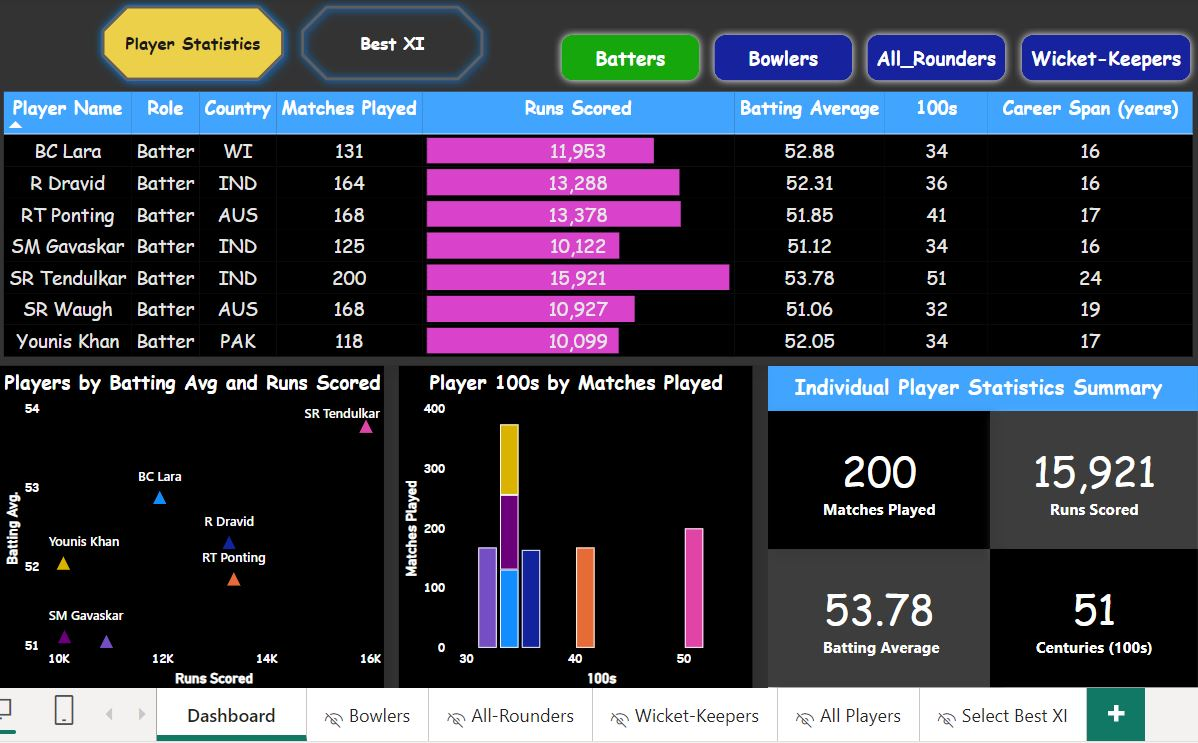

In [52]:
from IPython.display import Image
Image(r'C:\Users\Hryshikesh\Desktop\DA Projects\Projects\Cricket\Dashboard_Image1.jpg')

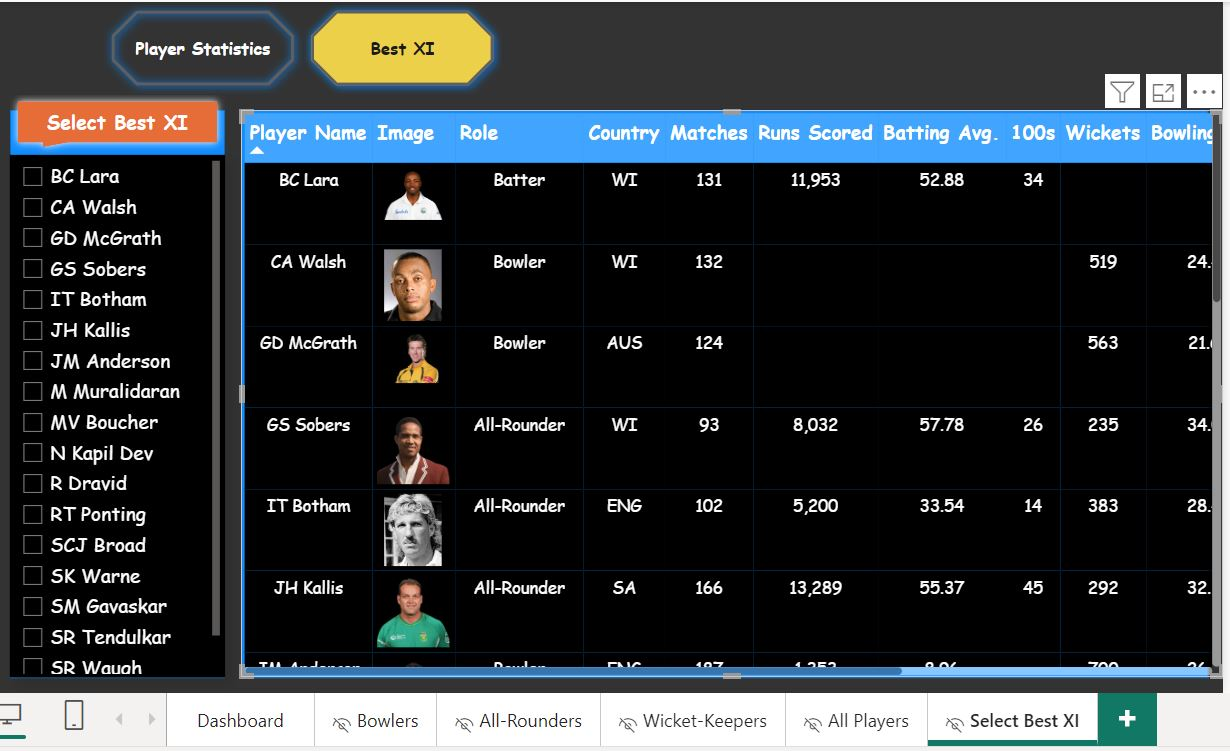

In [53]:
from IPython.display import Image
Image(r'C:\Users\Hryshikesh\Desktop\DA Projects\Projects\Cricket\Dashboard_BestXI.jpg')

# Result validation using SQL Queries and Output - Best XI

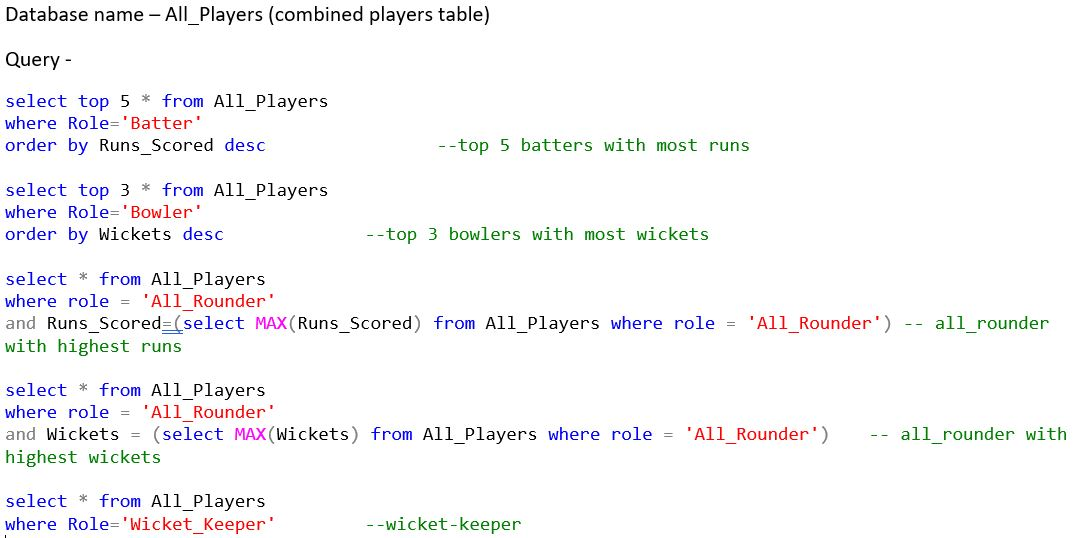

In [54]:
# SQL Query 

from IPython.display import Image
Image(r'C:\Users\Hryshikesh\Desktop\DA Projects\Projects\Cricket\SQL query.jpg')

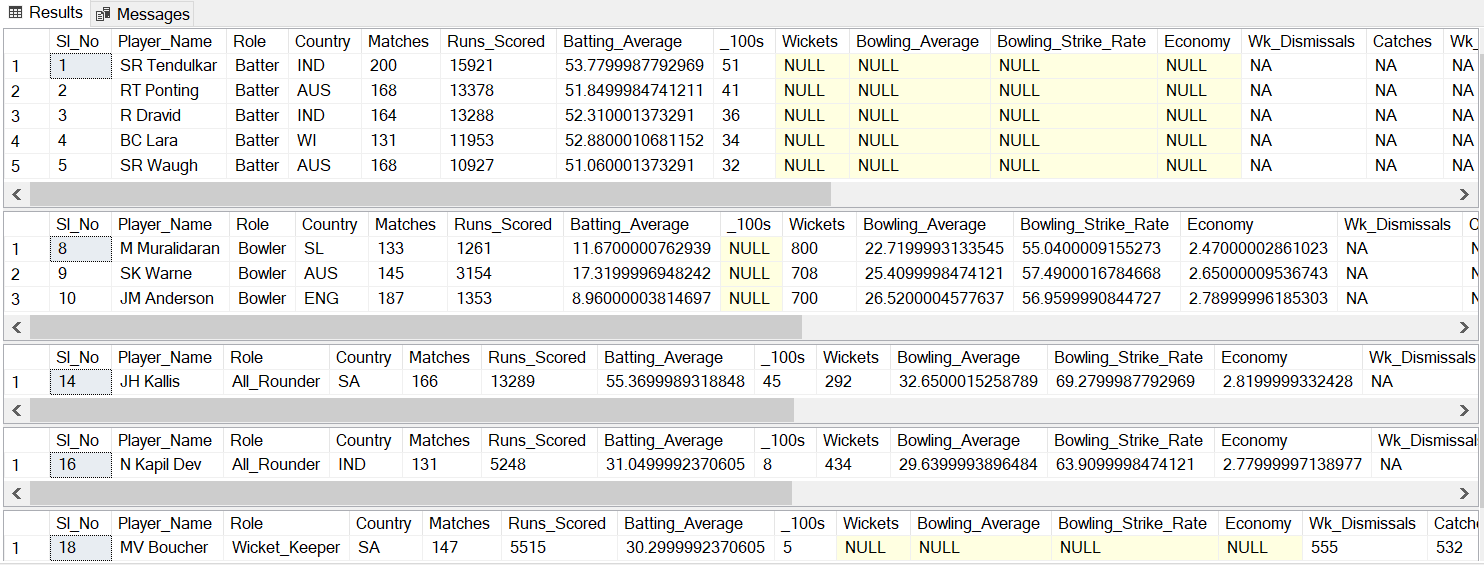

In [55]:
# SQL Output

from IPython.display import Image
Image(r'C:\Users\Hryshikesh\Desktop\DA Projects\Projects\Cricket\SQL Output.png')

# By - Hryshikesh Dihingia

Thank You :)